In [1]:
import torch
import pandas as pd

In [2]:
cd ..

/home/yann/IVISpaces


In [3]:
from Data import get_setup

In [ ]:
path='Results/2mean/'

# Experiment 2: Small 

In [4]:
RESULTS, STDS=torch.load(path+'2mean_smallUCI_Exp2_2020-11-11-10:42_metrics.pt')

for key in RESULTS.keys():
    print(key)

boston2
concrete2
energy2
wine2
yacht2


In [6]:
res=pd.DataFrame(RESULTS).transpose()

In [7]:
stds=pd.DataFrame(STDS).transpose()

In [9]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']


In [11]:
import numpy as np
metrics=['RMSE']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_min(axis=1)       
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI
,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE
boston2,16.474368,10.462313,850.604822,11.793420,19.455055,32.055981
concrete2,24.512291,13.458776,160.081522,21.260373,13.696864,14.137168
energy2,20.471799,22.054870,1042.573688,18.916697,35.117768,30.898000
wine2,0.834748,0.604121,16.550416,0.662751,0.659028,0.664271
yacht2,15.935315,12.252166,270.291480,14.954178,10.643587,12.656434


In [12]:
metrics=['LPP']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_max(axis=1)       
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI
,LPP,LPP,LPP,LPP,LPP,LPP
boston2,-4.654717,-3.886336,-6477.803952,-4.041967,-4.213687,-4.565804
concrete2,-5.112759,-8.752160,-67.587428,-4.697427,-4.052823,-4.070326
energy2,-13.121707,-4.678526,-87797.797591,-27.013779,-5.583186,-5.393456
wine2,-1.249841,-5.690019,-204.635561,-1.052958,-1.079310,-1.055690
yacht2,-4.192147,-7.746714,-185.722028,-4.124134,-3.960700,-4.082578


In [13]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
metrics=['time [s]']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round().astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round()).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} & McDropOut & Ensemble &     MFVI & FuNN-MFVI &  NN-HyVI & FuNN-HyVI \\
{} &  time [s] & time [s] & time [s] &  time [s] & time [s] &  time [s] \\
\midrule
boston2   &   0.0±0.0 &  0.0±0.0 &  0.0±0.0 &   0.0±0.0 &  0.0±0.0 &   0.0±0.0 \\
concrete2 &   0.0±0.0 &  0.0±0.0 &  0.0±0.0 &   0.0±0.0 &  0.0±0.0 &   0.0±0.0 \\
energy2   &   0.0±0.0 &  0.0±0.0 &  0.0±0.0 &   0.0±0.0 &  0.0±0.0 &   0.0±0.0 \\
wine2     &   0.0±0.0 &  0.0±0.0 &  0.0±0.0 &   0.0±0.0 &  0.0±0.0 &   0.0±0.0 \\
yacht2    &   0.0±0.0 &  0.0±0.0 &  0.0±0.0 &   0.0±0.0 &  0.0±0.0 &   0.0±0.0 \\
\bottomrule
\end{tabular}



## Predictive Epistemic Entropy #

In [24]:
Entropy=torch.load(path+'2mean_smallUCI_Exp2_2020-11-11-10:42_entropy.pt')

In [26]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
datasets=['boston2']#, 'concrete2', 'energy2','wine2', 'yacht2']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


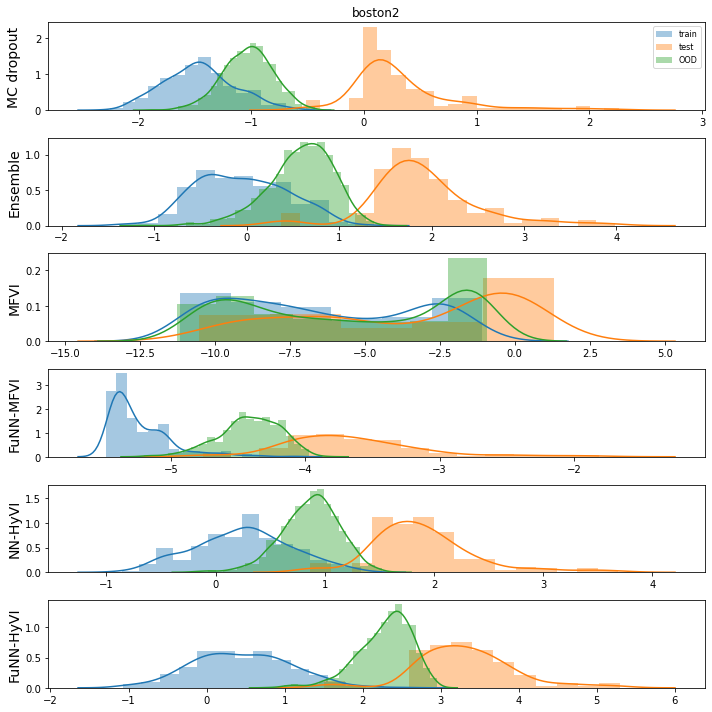

In [30]:
from Models import get_mlp
from torch import nn


import seaborn as sns
from pylab import *

#predictive model
layerwidth=50
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
split=5

d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, Hs in dic.items():
        H=Hs[split]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m])
        m+=1
        
    d+=1
ax[0,0].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig(path+"UCIsmall_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

## Accuracy in OOD detection

In [55]:
Entropy=torch.load(path+'/UCI_small_Exp2_2020-11-06-14:48_entropy.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
#methods=['Ensemble','NN-HyVI','FuNN-HyVI']
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

datasets=['boston', 'concrete', 'energy','wine', 'yacht']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


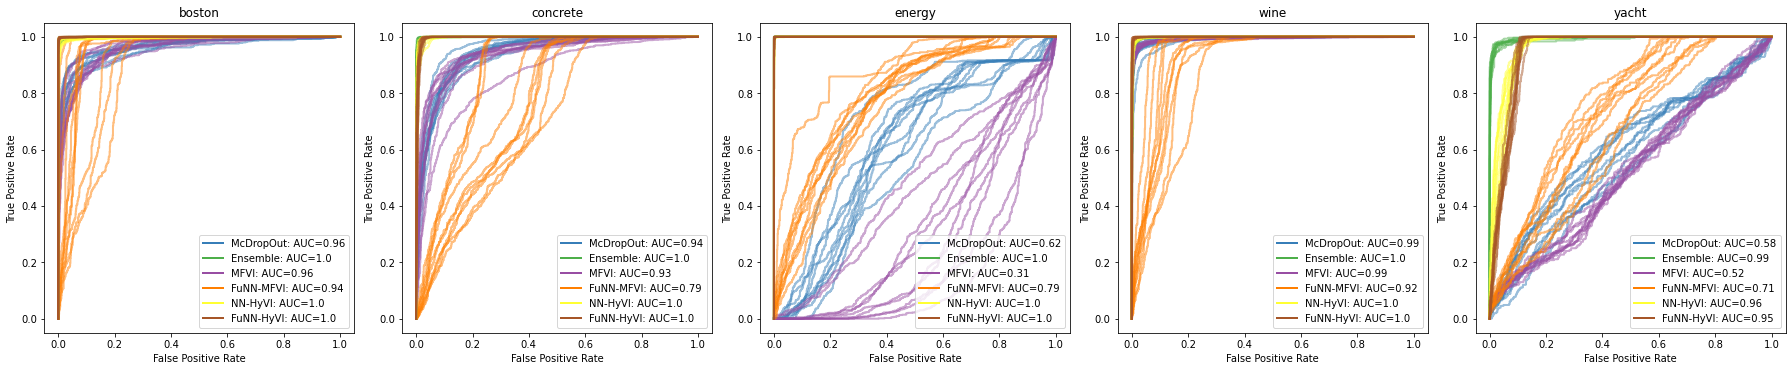

In [18]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(10):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig(path+"ROC.pdf", bbox_inches='tight', dpi=600)

plt.show()

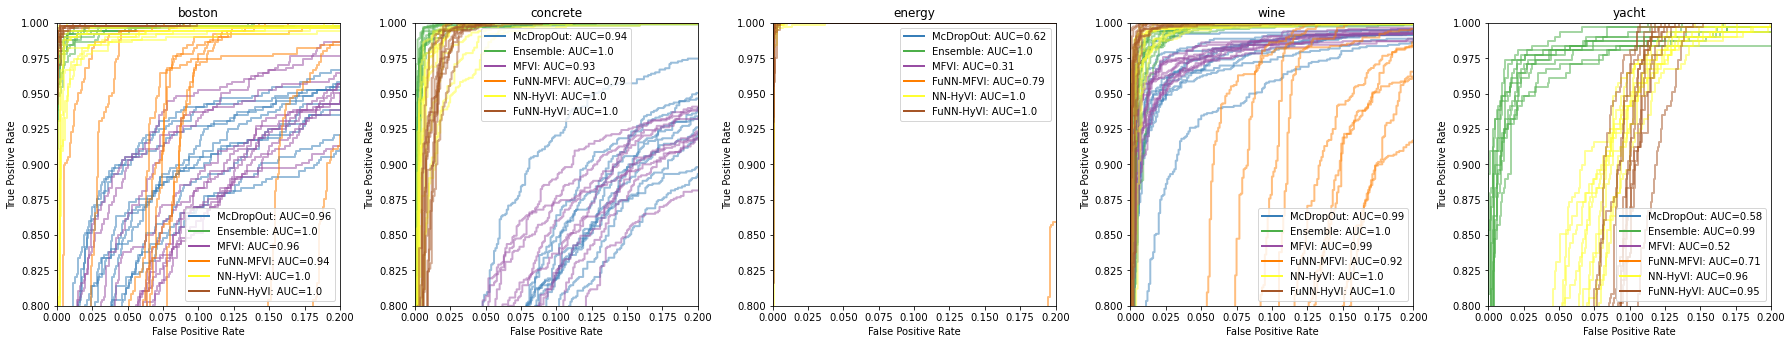

In [21]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(10):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_xlim(0.,0.2)
            ax[d].set_ylim(0.8,1.0)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig(path+"ROC_zoom.pdf", bbox_inches='tight', dpi=600)

plt.show()

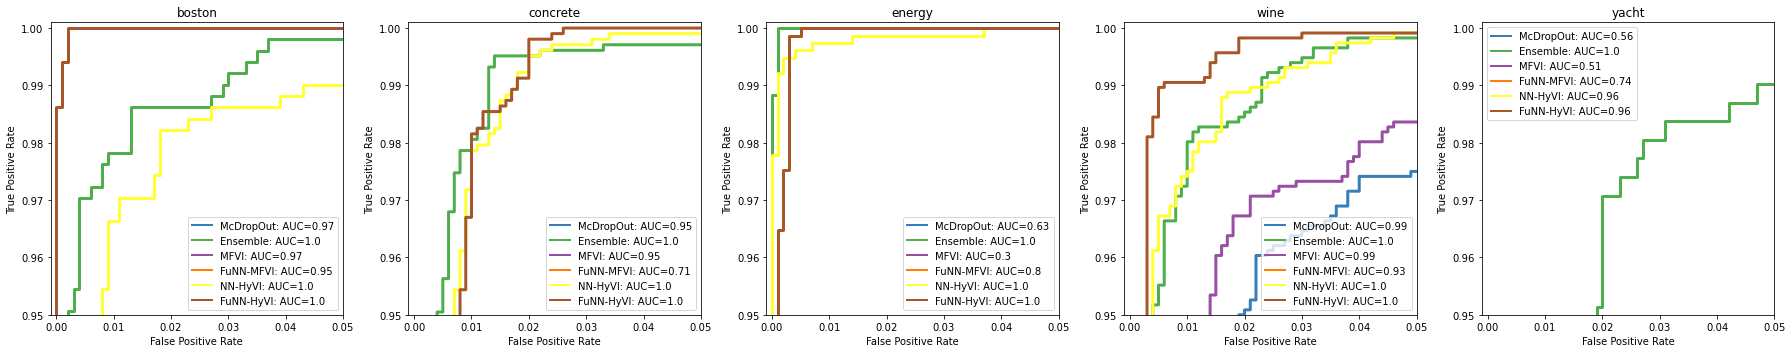

In [29]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in [4]:#range(1):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=3,color=cmap(m+1), alpha=1.)#ROC
            ax[d].set_xlim(-0.001,0.05)
            ax[d].set_ylim(0.95,1.001)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig(path+"ROC_zoom2.pdf", bbox_inches='tight', dpi=600)

plt.show()

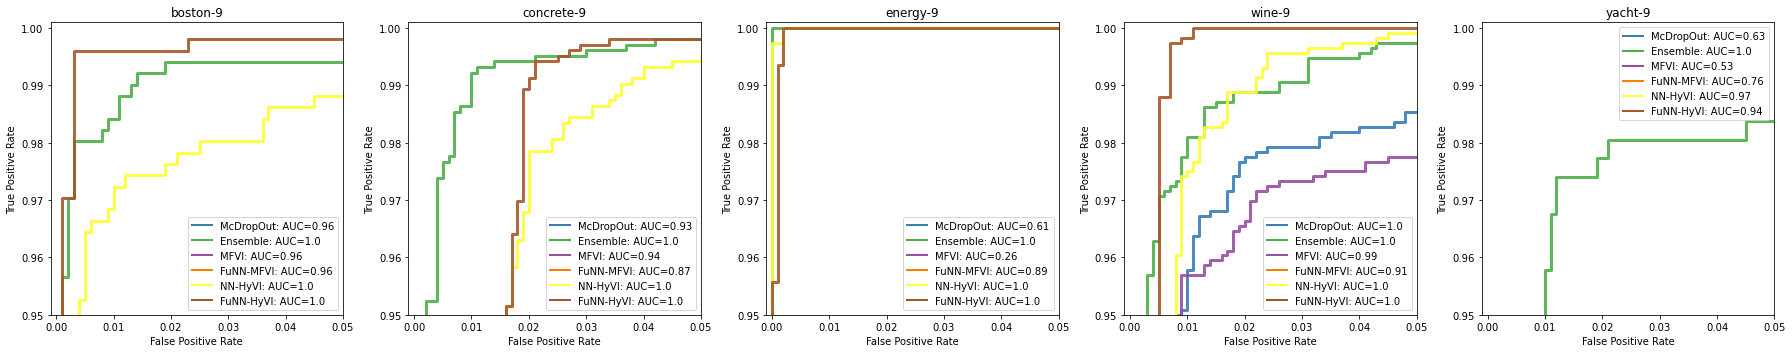

In [44]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=9
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        data=[]
        for nb_split in [nb_split]:#range(1):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=True)
            ax[d].plot(fpr,tpr, lw=3,color=cmap(m+1), alpha=.9)#ROC
            ax[d].set_xlim(-0.001,0.05)
            ax[d].set_ylim(0.95,1.001)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': AUC={}'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset+"-{}".format(nb_split))
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig(path+"ROC_zoom2.pdf", bbox_inches='tight', dpi=600)
plt.show()

In [73]:
import copy
from scipy.stats import wilcoxon
wil=copy.deepcopy(Entropy)

for dataset, dic in Entropy.items():
    custom_text=[]
    for method, Hs in dic.items():
        for nb_split in range(1):
            H=Hs[nb_split]
            y_true=torch.cat([H[0],H[1]]).cpu()
            y_false=H[2].cpu()
            diff=np.longdouble((y_false-y_true.unsqueeze(-1)).view(-1))
            #print(diff)
            w=wilcoxon(diff, alternative='greater')
            #print(w[1])
        wil[dataset][method]=w

In [74]:
pd.DataFrame(wil)

,boston,concrete,energy,wine,yacht
McDropOut,"(127450154958.5, 0.0)","(519577717015.5, 0.0)","(178218250776.0, 0.0)","(672690709311.0, 0.0)","(30218845598.5, 0.0)"
Ensemble,"(128017868843.0, 0.0)","(530449012454.0, 0.0)","(294912383997.0, 0.0)","(672770728476.0, 0.0)","(47421786361.0, 0.0)"
MFVI,"(127145419435.0, 0.0)","(520674733541.5, 0.0)","(19872446886.5, 1.0)","(672660995951.5, 0.0)","(25833758369.0, 0.0)"
FuNN-MFVI,"(127940624338.5, 0.0)","(510866882502.0, 0.0)","(254996104237.5, 0.0)","(669340433197.5, 0.0)","(33603027315.5, 0.0)"
NN-HyVI,"(128013314760.5, 0.0)","(530397410413.0, 0.0)","(294912383190.0, 0.0)","(672800487417.0, 0.0)","(47319686575.0, 0.0)"
FuNN-HyVI,"(128018108064.0, 0.0)","(530374175509.0, 0.0)","(294912334031.0, 0.0)","(672800276951.0, 0.0)","(46995260022.0, 0.0)"


In [75]:
import copy
from scipy.stats import wasserstein_distance
wass=copy.deepcopy(Entropy)

for dataset, dic in Entropy.items():
    custom_text=[]
    for method, Hs in dic.items():
        for nb_split in range(1):
            H=Hs[nb_split]
            y_true=torch.cat([H[0],H[1]]).cpu()
            y_false=H[2].cpu()
            w=wasserstein_distance(y_true,y_false)
        wass[dataset][method]=w

In [76]:
pd.DataFrame(wass).transpose().style.highlight_max(axis=1)

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI
boston,1.257,2.983,0.852,2.627,2.221,7.259
concrete,0.836,2.491,0.587,8.356,3.272,7.109
energy,0.142,3.648,1.902,3.399,4.671,11.179
wine,1.498,2.159,1.203,8.160,2.574,6.986
yacht,0.205,2.678,0.048,1.784,3.322,8.521


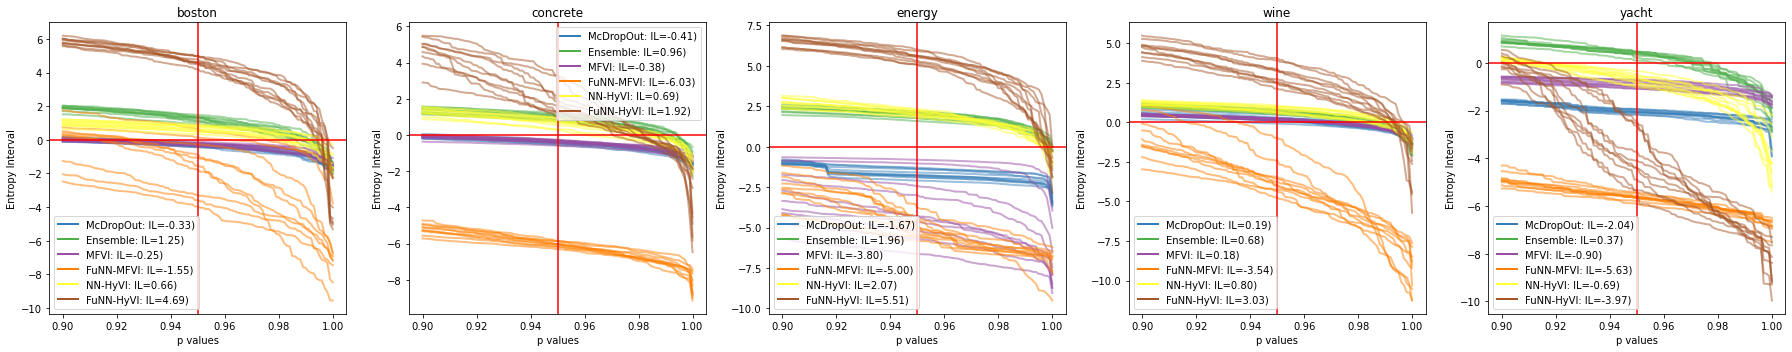

In [56]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=5
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        IntervalLength=[]
        for nb_split in range(10):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            p_values=np.linspace(0.9,1.,101)
            #print(p_values[50])
            #print(tpr,thresholds)
            tp_above=np.asarray(tpr>=np.expand_dims(p_values,-1))
            index_min_tp_above_per_p_value=[np.nonzero(tp_above[i])[0].min() for i in range(101)]
            tp_thresh_values=np.array([thresholds[i] for i in index_min_tp_above_per_p_value])
            tn_above=np.asarray(1-fpr>=np.expand_dims(p_values,-1))
            index_min_tn_above_per_p_value=[np.nonzero(tn_above[i])[0].max() for i in range(101)]
            tn_thresh_values=np.array([thresholds[i] for i in index_min_tn_above_per_p_value])
            ax[d].plot(p_values, tp_thresh_values-tn_thresh_values, lw=2,color=cmap(m+1), alpha=0.5)
       #     ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
       #     ax[d].set_aspect('equal', adjustable='box')
            IntervalLength.append(tp_thresh_values[50]-tn_thresh_values[50])
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': IL={:.2f})'.format(np.mean(IntervalLength)))
    ax[d].axhline(0., color='red')
    ax[d].axvline(0.95, color='red')


    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('p values')
    ax[d].set_ylabel('Entropy Interval')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig(path+"IntervalLength.pdf", bbox_inches='tight', dpi=600)

plt.show()

# Exp 2 large

In [45]:
RESULTS, STDS=torch.load(path+'UCI_large_Exp2_2020-11-06-01:42_metrics.pt')

for key in RESULTS.keys():
    print(key)

kin8nm
navalC
powerplant
protein


In [79]:
for dataset in RESULTS.keys():
    RESULTS[dataset].update(FBNN[dataset])
    #RESULTS[dataset].update(RESULTS_[dataset])

for dataset in STDS.keys():
    STDS[dataset].update(sFBNN[dataset])

In [80]:
res=pd.DataFrame(RESULTS).transpose()

In [81]:
stds=pd.DataFrame(STDS).transpose()

In [82]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI', 'FBNN']
res

Ensemble                             McDropOut                  \
                 RMSE     LPP time [s] std noise       RMSE    LPP time [s]   
kin8nm      7.166e-02  -2.056  147.343       0.0  8.044e-02  1.152  118.659   
navalC      3.975e-04   5.532  215.542       0.0  9.468e-04  4.641  172.041   
powerplant  3.982e+00 -56.471  173.251       0.0  4.051e+00 -2.836  139.131   
protein     4.105e+00 -13.417  843.636       0.0  4.433e+00 -3.882  746.224   

                        NN-HyVI         ...       MFVI                   \
           std noise       RMSE    LPP  ...       RMSE    LPP  time [s]   
kin8nm         0.253  6.978e-02  1.230  ...  8.118e-02  1.088   302.023   
navalC         0.229  2.234e-04  6.992  ...  4.330e-04  6.320   514.425   
powerplant     0.268  3.917e+00 -2.785  ...  4.051e+00 -2.819   201.961   
protein        0.320  4.170e+00 -2.847  ...  4.292e+00 -2.876  1199.635   

                      FuNN-MFVI                                  FBNN         
           std noise       RMSE    LPP  time [s] std noise       RMSE    LPP  
kin8nm         0.278  7.432e-02  1.164   168.190     0.243        NaN    NaN  
navalC         0.032  6.075e-04  6.030   442.824     0.042  1.200e-04  7.130  
powerplant     0.228  3.976e+00 -2.801   152.107     0.227        NaN    NaN  
protein        0.687  4.172e+00 -2.848  1195.537     0.664  4.326e+00 -2.892  

[4 rows x 26 columns]

In [83]:
import numpy as np
metrics=['RMSE']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(5)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].style.highlight_min(axis=1)    
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE,RMSE
kin8nm,0.080,0.072,0.081,0.074,0.070,0.071,nan
navalC,0.001,0.000,0.000,0.001,0.000,0.000,0.000
powerplant,4.051,3.982,4.051,3.976,3.917,3.913,nan
protein,4.433,4.105,4.292,4.172,4.170,4.152,4.326


In [84]:
metrics=['LPP']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round(2).astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round(2)).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
res[index].round(2).style.highlight_max(axis=1)        
#print(res_[index].to_latex())

,McDropOut,Ensemble,MFVI,FuNN-MFVI,NN-HyVI,FuNN-HyVI,FBNN
,LPP,LPP,LPP,LPP,LPP,LPP,LPP
kin8nm,1.150,-2.060,1.090,1.160,1.230,1.190,nan
navalC,4.640,5.530,6.320,6.030,6.990,7.120,7.130
powerplant,-2.840,-56.470,-2.820,-2.800,-2.790,-2.790,nan
protein,-3.880,-13.420,-2.880,-2.850,-2.850,-2.840,-2.890


In [85]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
metrics=['time [s]']#['LPP']#'RMSE']##['RMSE']#,'LPP']#metrics=['time [s]']
index=pd.MultiIndex.from_product([methods,metrics])#, 
res_=res.copy()
for i in res[index].columns:
    res_[i] = res[i].round().astype(str)+ "±" + ((stds[i]/np.sqrt(10)).round()).astype(str)+""
    #res_[i] = res[i].round(2).astype(str)
    
print(res_[index].to_latex())

\begin{tabular}{lllllll}
\toprule
{} &  McDropOut &   Ensemble &         MFVI &    FuNN-MFVI &     NN-HyVI &   FuNN-HyVI \\
{} &   time [s] &   time [s] &     time [s] &     time [s] &    time [s] &    time [s] \\
\midrule
kin8nm     &  119.0±0.0 &  147.0±0.0 &   302.0±12.0 &    168.0±3.0 &    89.0±3.0 &   145.0±7.0 \\
navalC     &  172.0±0.0 &  216.0±0.0 &   514.0±12.0 &   443.0±17.0 &   208.0±4.0 &   433.0±6.0 \\
powerplant &  139.0±0.0 &  173.0±0.0 &    202.0±4.0 &    152.0±8.0 &    90.0±2.0 &   145.0±5.0 \\
protein    &  746.0±1.0 &  844.0±0.0 &  1200.0±38.0 &  1196.0±20.0 &  538.0±14.0 &  986.0±22.0 \\
\bottomrule
\end{tabular}



## large : Predictive Epistemic Entropy #

In [86]:
Entropy=torch.load(path+'UCI_large_Exp2_2020-11-06-01:42_entropy.pt')

In [87]:
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
datasets=['kin8nm', 'navalC', 'powerplant', 'protein']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


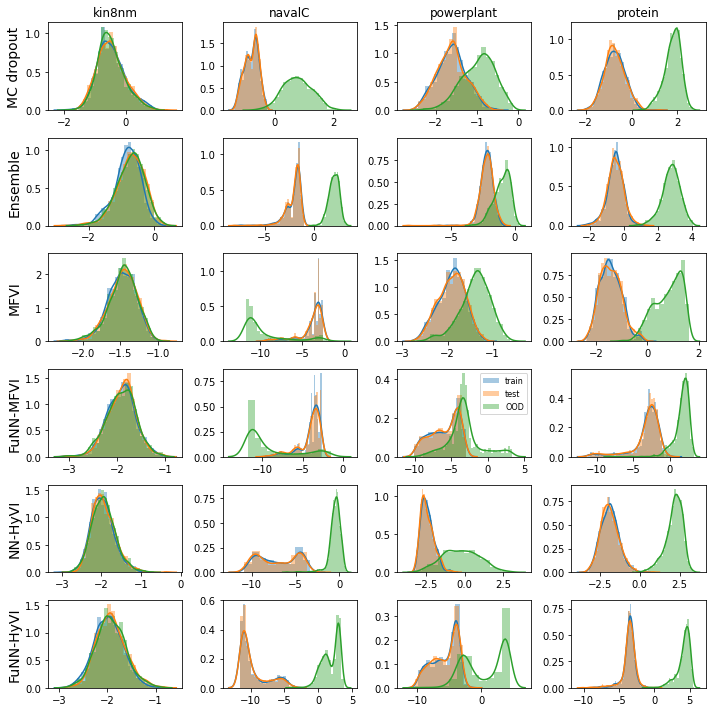

In [88]:
from Models import get_mlp
from torch import nn


import seaborn as sns
from pylab import *

#predictive model
layerwidth=100
nblayers=1
activation=nn.ReLU()

device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':14,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':14}
plt.rcParams.update(parameters)

n_datasets=len(datasets)
n_methods=len(methods)
fig,ax=plt.subplots(n_methods,n_datasets,figsize=(10,10),squeeze=False)


method_names=['MC dropout','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']

label=['train', 'test', 'OOD']
split=0

d=0
for dataset, dic in Entropy.items():
    m=0
    ax[m,d].set_title(dataset)
    for method, Hs in dic.items():
        H=Hs[split]
        for i in range(len(H)):
            sns.distplot(H[i].cpu(), label=label[i], ax=ax[m,d], kde=True)#, color=colors[i])#, hist=False, norm_hist=True)#color=colors[i],
            if d ==0:
                if method=='FuNNeVI' or method== 'GeNNeVI':
                    ax[m,d].set_ylabel(method_names[m], {'fontweight':'bold'})
                else:
                    ax[m,d].set_ylabel(method_names[m])
        m+=1
        
    d+=1
ax[3,2].legend(loc='upper right', prop={'size': 8})#bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()
fig.align_ylabels(ax[:, 0])
plt.savefig(path+"UCIlarge_PredictiveEntropy_Exp2.pdf", dpi=600)
#plt.subplots_adjust(top=.9)
#plt.suptitle('Posterior Predictive Entropy Distributions')
plt.show()

## Accuracy in OOD detection

In [46]:
Entropy=torch.load(path+'UCI_large_Exp2_2020-11-06-01:42_entropy.pt')
methods=['McDropOut','Ensemble','MFVI','FuNN-MFVI','NN-HyVI','FuNN-HyVI']
#methods=['Ensemble','NN-HyVI','FuNN-HyVI']

datasets=['kin8nm', 'navalC', 'powerplant', 'protein']
#metrics=['RMSE','LPP']
index=pd.MultiIndex.from_product([methods,datasets])

df=pd.DataFrame(data=Entropy, index=methods, columns=datasets)
Entropy=df.to_dict()


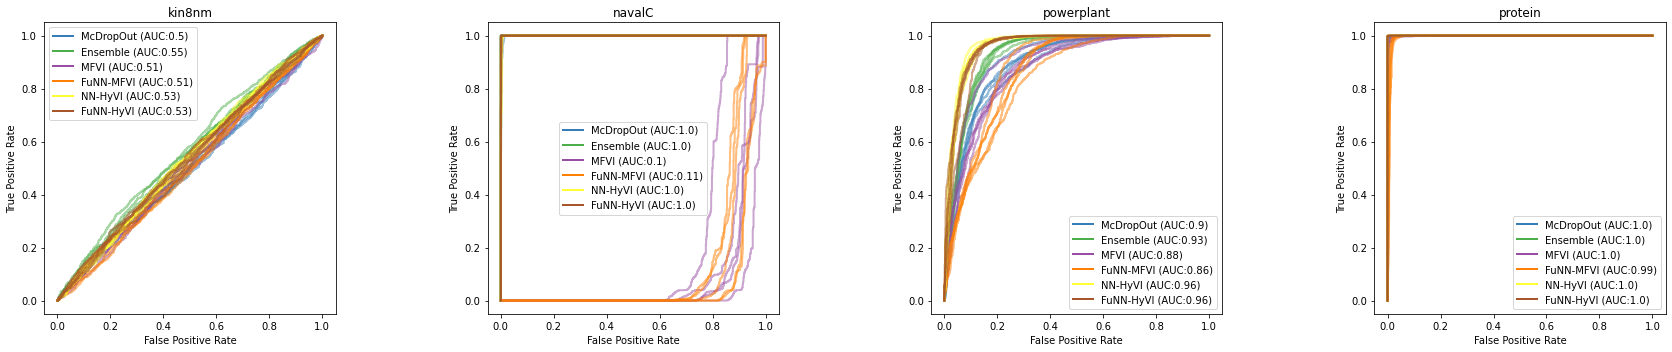

In [47]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig(path+"ROC_largeUCI.pdf", bbox_inches='tight', dpi=600)

plt.show()

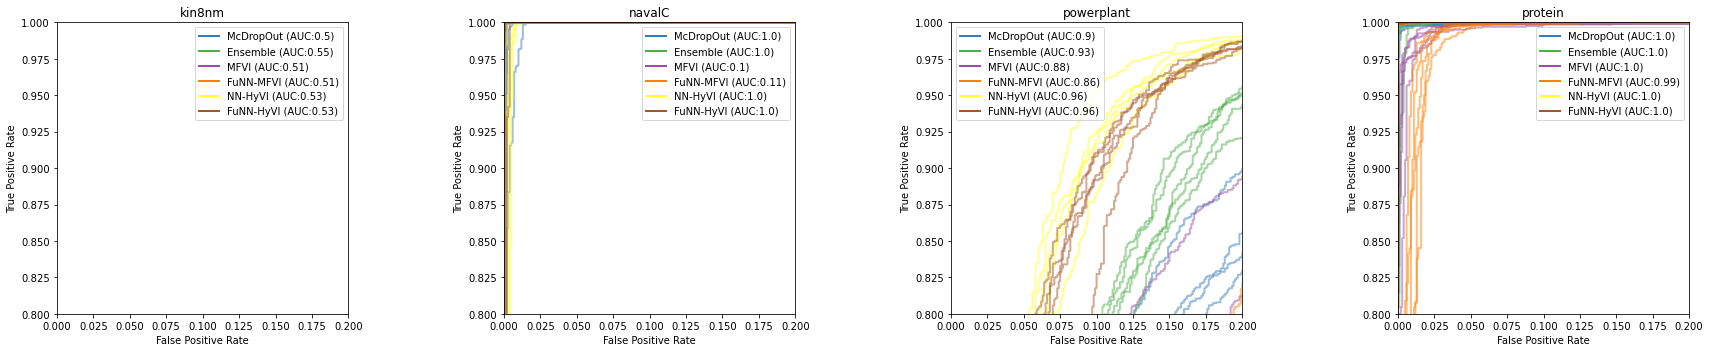

In [48]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
            ax[d].set_xlim(0.,0.2)
            ax[d].set_ylim(0.8,1.0)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig(path+"ROC_largeUCI_zoom.pdf", bbox_inches='tight', dpi=600)

plt.show()

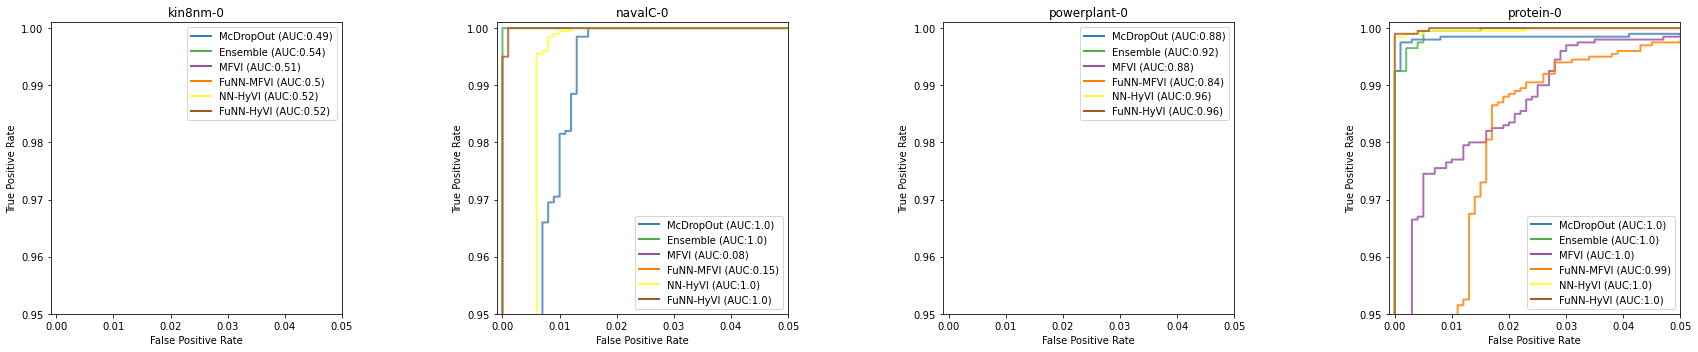

In [53]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        AUCs=[]
        for nb_split in [nb_split]:#range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.8)#ROC
            ax[d].set_xlim(-0.001,0.05)
            ax[d].set_ylim(0.95,1.001)
            ax[d].set_aspect('equal', adjustable='box')
            AUCs.append(roc_auc_score(y_true.cpu(), y_score.cpu()))
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+' (AUC:{})'.format(np.mean(AUCs).round(2)))
    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset+"-{}".format(nb_split))
    ax[d].set_xlabel('False Positive Rate')
    ax[d].set_ylabel('True Positive Rate')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
plt.savefig('test.png')#, bbox_inches='tight')
fig.savefig(path+"ROC_largeUCI_zoom2.pdf", bbox_inches='tight', dpi=600)

plt.show()

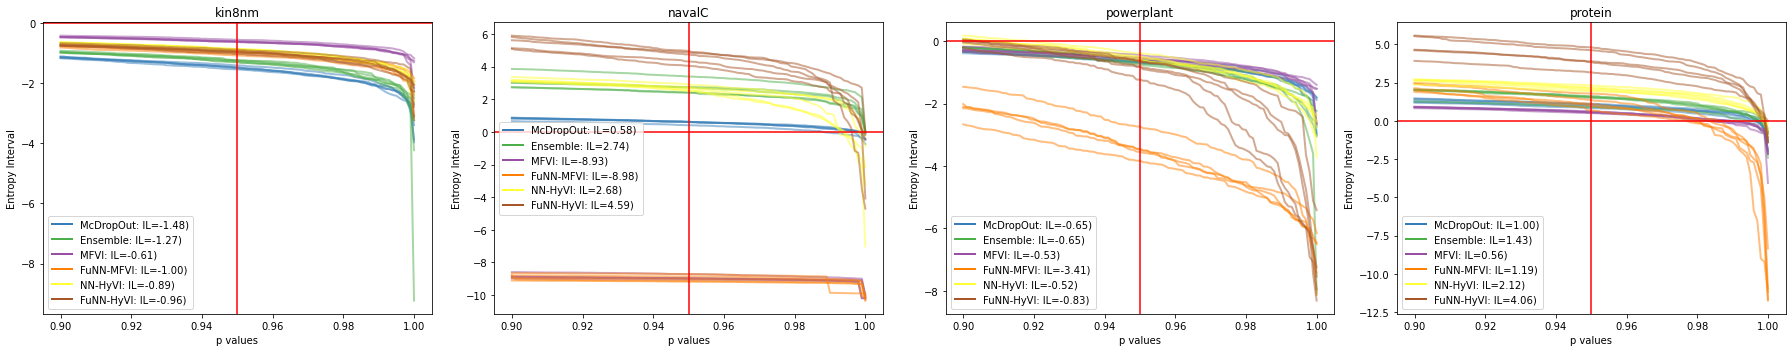

In [54]:
import seaborn as sns
from pylab import *
import seaborn as sb
from sklearn.metrics import roc_curve, roc_auc_score
cmap=plt.get_cmap('Set1')
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

parameters = {'axes.labelsize':10,
              'axes.titlesize': 12,
              'xtick.labelsize' : 10,
              'ytick.labelsize' : 10,
              'figure.titlesize':15}
plt.rcParams.update(parameters)

n_datasets=4
n_methods=6
fig,ax=plt.subplots(1,n_datasets,figsize=(25,5))

custom_lines = [Line2D([0], [0], color=cmap(m+1), lw=2) for m in range(n_methods)]
nb_split=0
d=0
for dataset, dic in Entropy.items():
    m=0
    custom_text=[]
    for method, Hs in dic.items():
        IntervalLength=[]
        for nb_split in range(5):
            H=Hs[nb_split]
            y_true=torch.cat([torch.ones_like(torch.cat([H[0],H[1]])),torch.zeros_like(H[2])])
            y_score=-torch.cat([H[0],H[1],H[2]])
            fpr, tpr, thresholds = roc_curve(y_true.cpu(), y_score.cpu(),drop_intermediate=False)
            p_values=np.linspace(0.9,1.,101)
            #print(p_values[50])
            #print(tpr,thresholds)
            tp_above=np.asarray(tpr>=np.expand_dims(p_values,-1))
            index_min_tp_above_per_p_value=[np.nonzero(tp_above[i])[0].min() for i in range(101)]
            tp_thresh_values=np.array([thresholds[i] for i in index_min_tp_above_per_p_value])
            tn_above=np.asarray(1-fpr>=np.expand_dims(p_values,-1))
            index_min_tn_above_per_p_value=[np.nonzero(tn_above[i])[0].max() for i in range(101)]
            tn_thresh_values=np.array([thresholds[i] for i in index_min_tn_above_per_p_value])
            ax[d].plot(p_values, tp_thresh_values-tn_thresh_values, lw=2,color=cmap(m+1), alpha=0.5)
       #     ax[d].plot(fpr,tpr, lw=2,color=cmap(m+1), alpha=0.5)#ROC
       #     ax[d].set_aspect('equal', adjustable='box')
            IntervalLength.append(tp_thresh_values[50]-tn_thresh_values[50])
        #    ax[d].plot(thresh.cpu(),TPR.cpu(), label=method, color=cmap(m))
       #     ax[d].plot(thresh.cpu(),1-FNR.cpu(), label=method, color=cmap(m))
        m+=1
        custom_text.append(method+': IL={:.2f})'.format(np.mean(IntervalLength)))
    ax[d].axhline(0., color='red')
    ax[d].axvline(0.95, color='red')


    lgd = ax[d].legend(custom_lines, custom_text, loc='best')
    ax[d].set_title(dataset)
    ax[d].set_xlabel('p values')
    ax[d].set_ylabel('Entropy Interval')
    d+=1
#, bbox_to_anchor=(2.3,0.5))
#fig.legend(loc='upper right', prop={'size': 8})
fig.tight_layout()
#fig.align_ylabels(ax[:, 0])
fig.savefig(path+"IntervalLength_large.pdf", bbox_inches='tight', dpi=600)

plt.show()